# Test for interactive tools in JuPyter

## Sliders

In [2]:
%matplotlib inline
from pylab import *

In [3]:
from ipywidgets import interactive
from IPython.display import display

In [4]:
def f(a,b):
    return a*b
s=interactive(f,a=(0.,15.),b=(0,20))
display(s)

75.0

In [5]:
from IPython.display import Audio
def beat_freq(f1=220.0, f2=224.0):
    max_time = 3
    rate = 8000
    times = np.linspace(0,max_time,rate*max_time)
    signal = np.sin(2*np.pi*f1*times) + np.sin(2*np.pi*f2*times)
    print(f1, f2, abs(f1-f2),times)
    display(Audio(data=signal, rate=rate))
    return signal

In [6]:
v = interactive(beat_freq, f1=(200.0,300.0), f2=(200.0,300.0))
display(v)

220.0 224.0 4.0 [  0.00000000e+00   1.25005209e-04   2.50010417e-04 ...,   2.99974999e+00
   2.99987499e+00   3.00000000e+00]


array([  0.00000000e+00,   3.46966469e-01,   6.83408155e-01, ...,
        -6.83408155e-01,  -3.46966469e-01,   3.84296828e-13])

In [7]:
v.result

array([  0.00000000e+00,   3.46966469e-01,   6.83408155e-01, ...,
        -6.83408155e-01,  -3.46966469e-01,   3.84296828e-13])

250.0 255.0 5.0 [  0.00000000e+00   1.25005209e-04   2.50010417e-04 ...,   2.99974999e+00
   2.99987499e+00   3.00000000e+00]


array([  0.00000000e+00,   3.94046867e-01,   7.72641607e-01, ...,
        -7.72641607e-01,  -3.94046867e-01,  -6.05547083e-13])

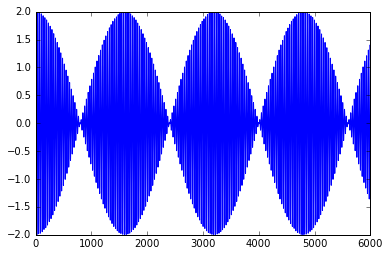

In [8]:
f1, f2 = v.children
f1.value = 250
f2.value = 255
plt.plot(v.result[0:6000])

In [9]:
def func(a,b):
    max_val = 200
    N_val   = 20000
    change  = linspace(0,max_val,N_val)
    output  = a*cos(b*change)
    print(a,b,output[N_val/2])
    plot(change,output,linewidth=2.0)
    ylim(-5,5)
    show()

0.0 0.5 0.0


/home/nnem614/Documents/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


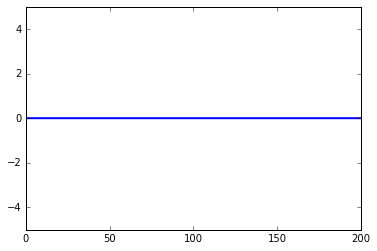

In [10]:
a,b = v.children
a.description = 'amplitude'
b.description = 'frequency'
v = interactive(func,a=(-5.,5.), b=(0.,1.))
display(v)

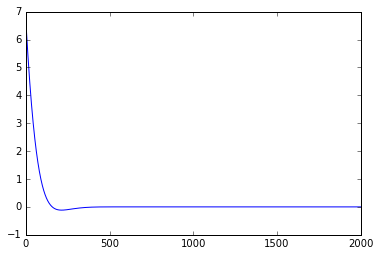

In [50]:
plt.plot(v.result[0:2000])

In [69]:
vec1 = array([1,2])
vec2 = array([4,3])
(vec1*vec2)[0]

4